In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/sai/Desktop/DSBDA/Assi5/Social_Network.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
df = pd.DataFrame(df)

In [4]:
X = df[['Age', 'EstimatedSalary']]
Y = df['Purchased']

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [7]:
scaler

StandardScaler()

In [8]:
logreg = LogisticRegression()

In [9]:
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [10]:
y_pred_train = logreg.predict(xtrain)
y_pred_test = logreg.predict(xtest)

In [11]:
precision = precision_score(ytest, y_pred_test)
conf_matrix = confusion_matrix(ytest, y_pred_test)
accuracy = accuracy_score(ytest, y_pred_test)
error_rate = 1 - accuracy
recall = recall_score(ytest, y_pred_test)

In [21]:
print("Precision:", precision)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Error rate:", error_rate)
print("Recall:", recall)

Precision: 0.8695652173913043
Confusion Matrix:
 [[49  3]
 [ 8 20]]
Accuracy: 0.8625
Error rate: 0.13749999999999996
Recall: 0.7142857142857143


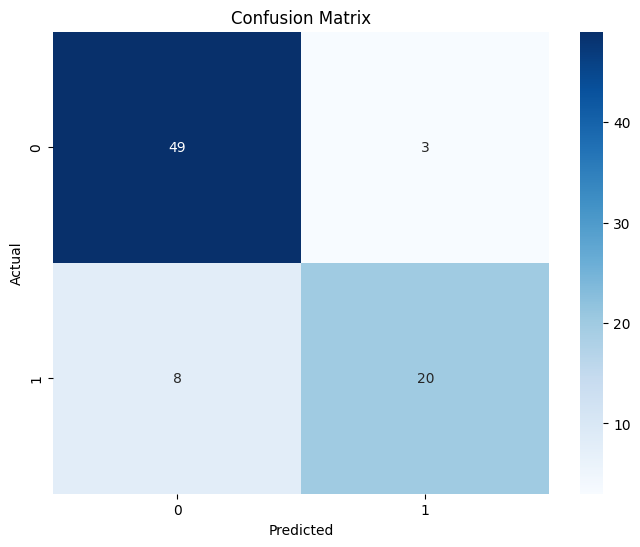

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d")  
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]


In [32]:
print("\nTrue Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)



True Positives: 20
False Positives: 3
True Negatives: 49
False Negatives: 8


In [19]:
from sklearn.metrics import classification_report
cr= classification_report(ytest,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        52
           1       0.87      0.71      0.78        28

    accuracy                           0.86        80
   macro avg       0.86      0.83      0.84        80
weighted avg       0.86      0.86      0.86        80

